## Chronic Kidney Disease
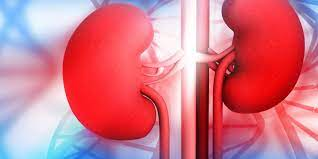

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

    1. Features:
    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - haemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    classification - class

In [4]:
### rename column names to make it more user-friendly

In [5]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [6]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.columns=columns['abb_col_names'].values

In [9]:
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

    As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
    change to numerical dtype.

In [11]:
features=['red blood cell count','packed cell volume','white blood cell count']

In [12]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [13]:
for feature in features:
    convert_dtype(df,feature)

    Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't 
    help us to find any insights from the data

In [14]:
df.drop(["id"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [15]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [16]:
cat_col,num_col=extract_cat_num(df)

In [17]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [18]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [19]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




    So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [20]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [21]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




    Looks good now apart from the NaNs

In [22]:
len(num_col)

14

###  Checking features distribution

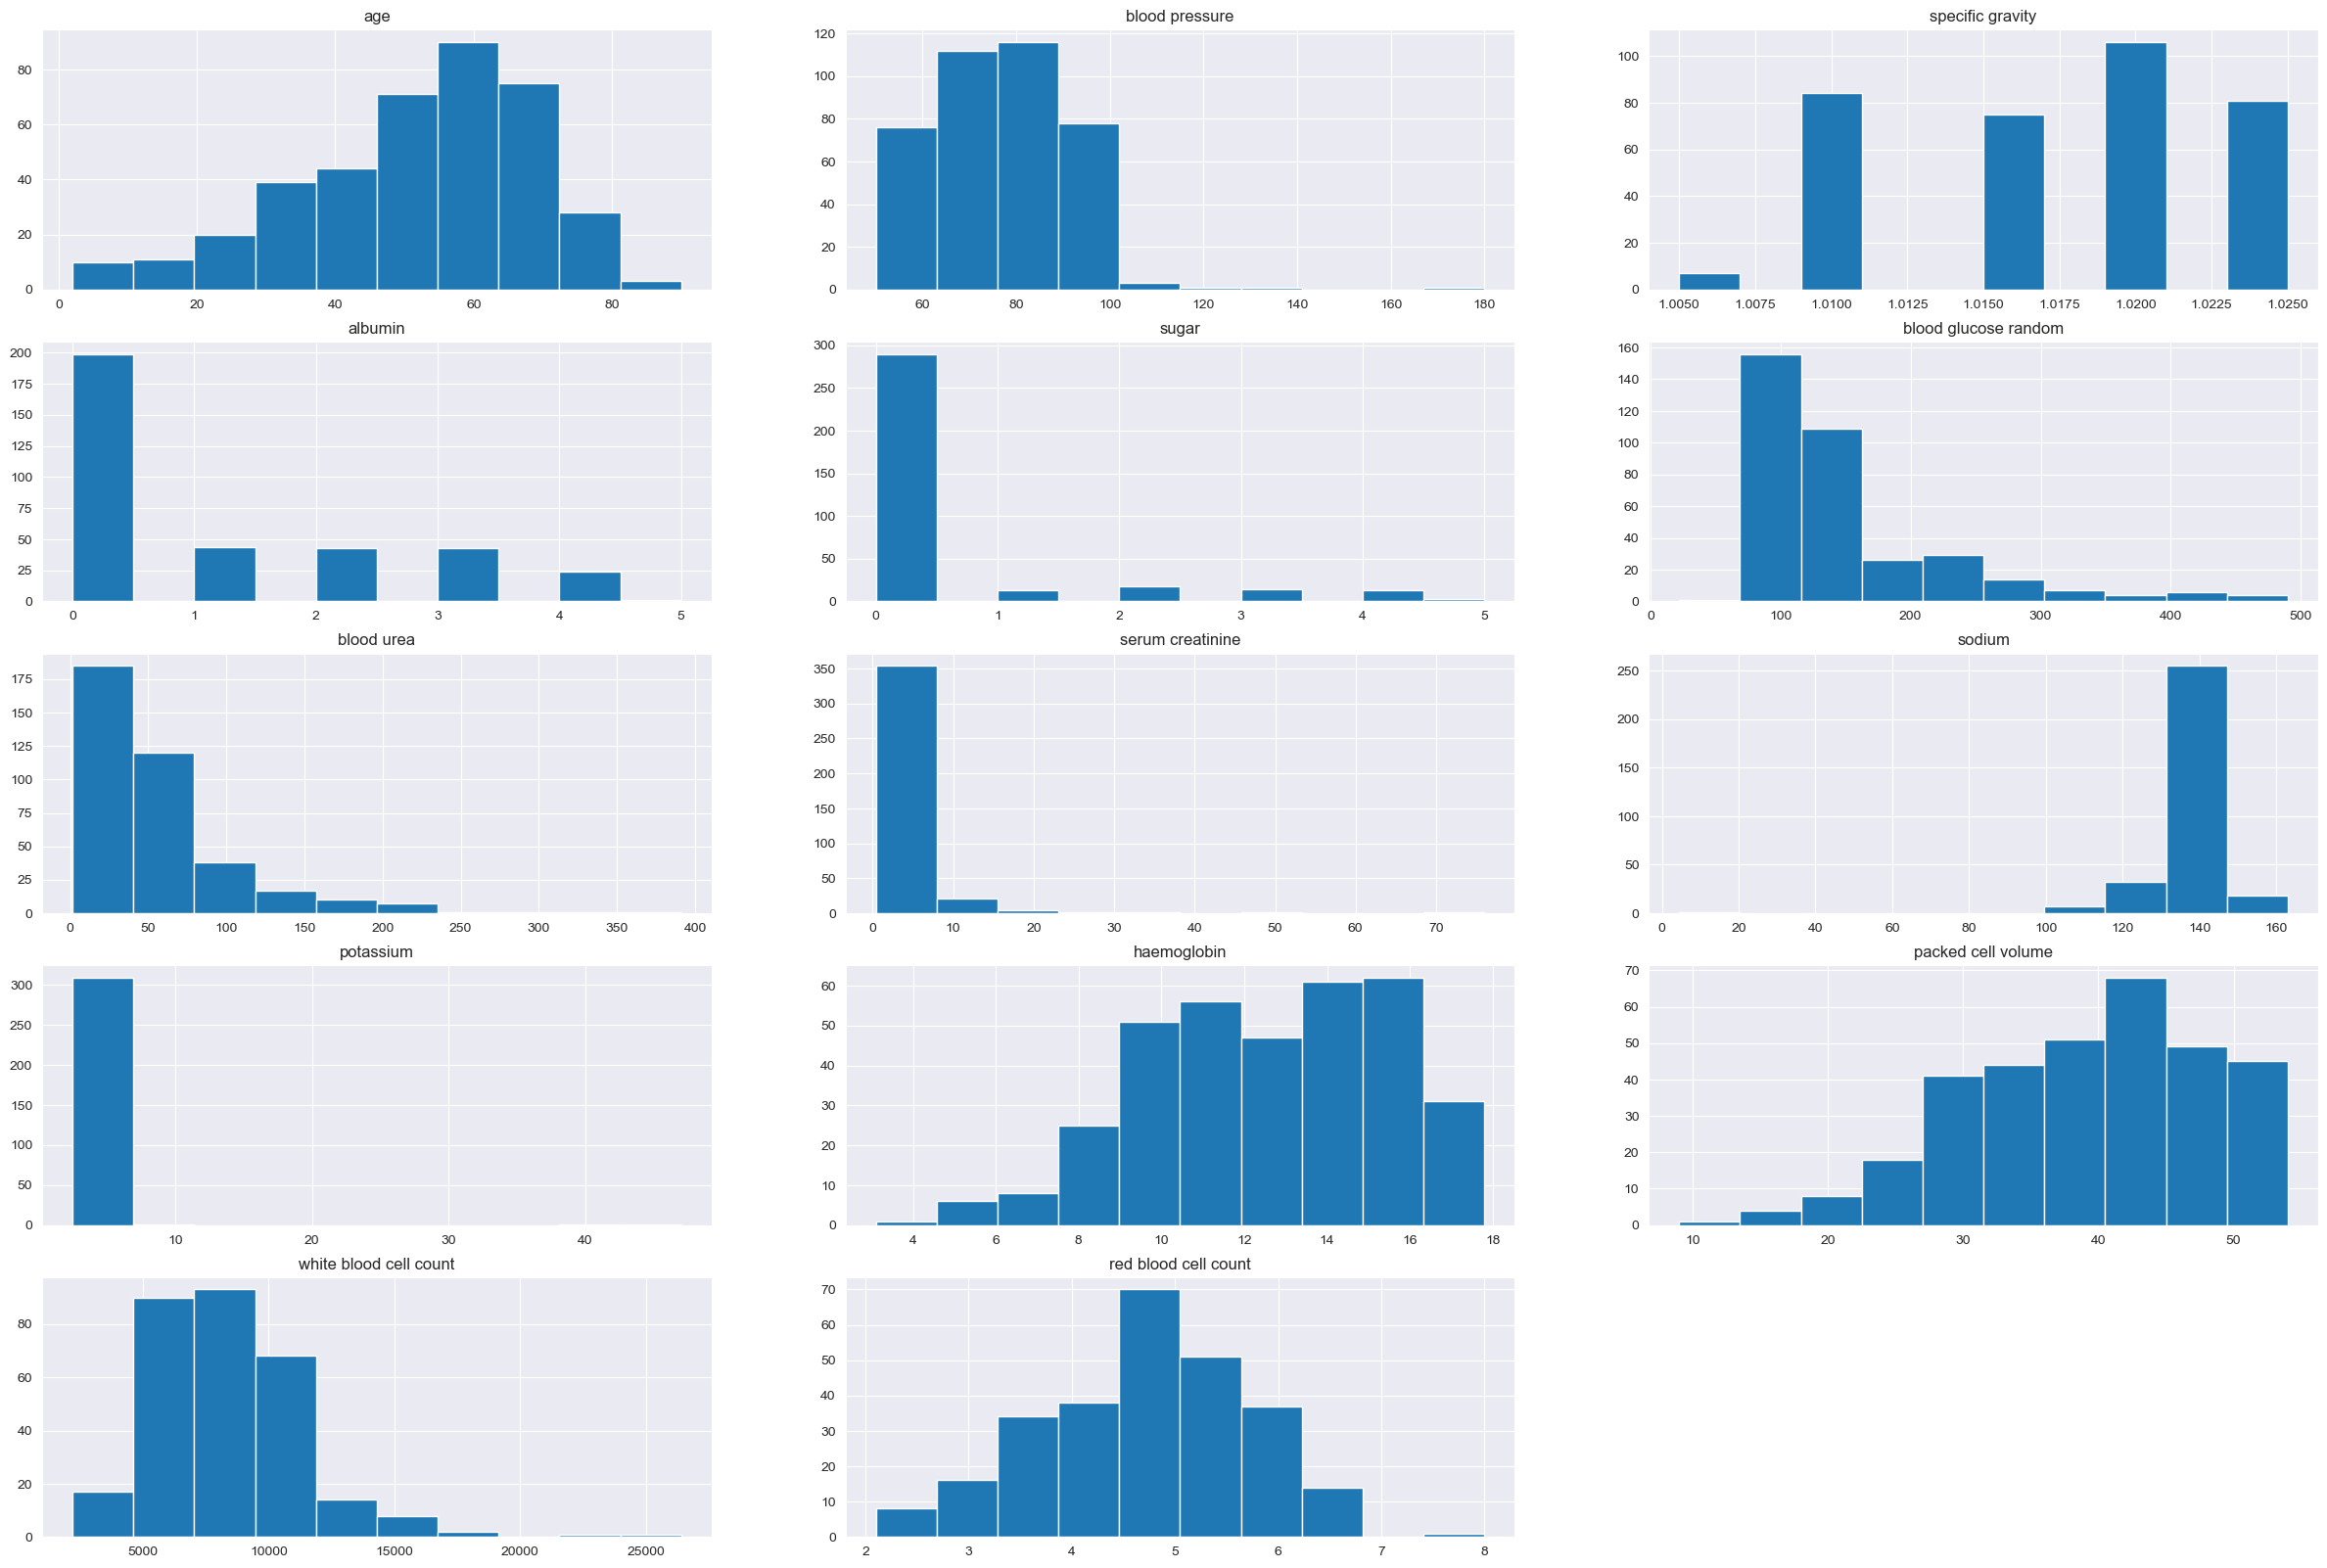

In [23]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Now, let's check the label distribution for categorical data

In [24]:
len(cat_col)

11

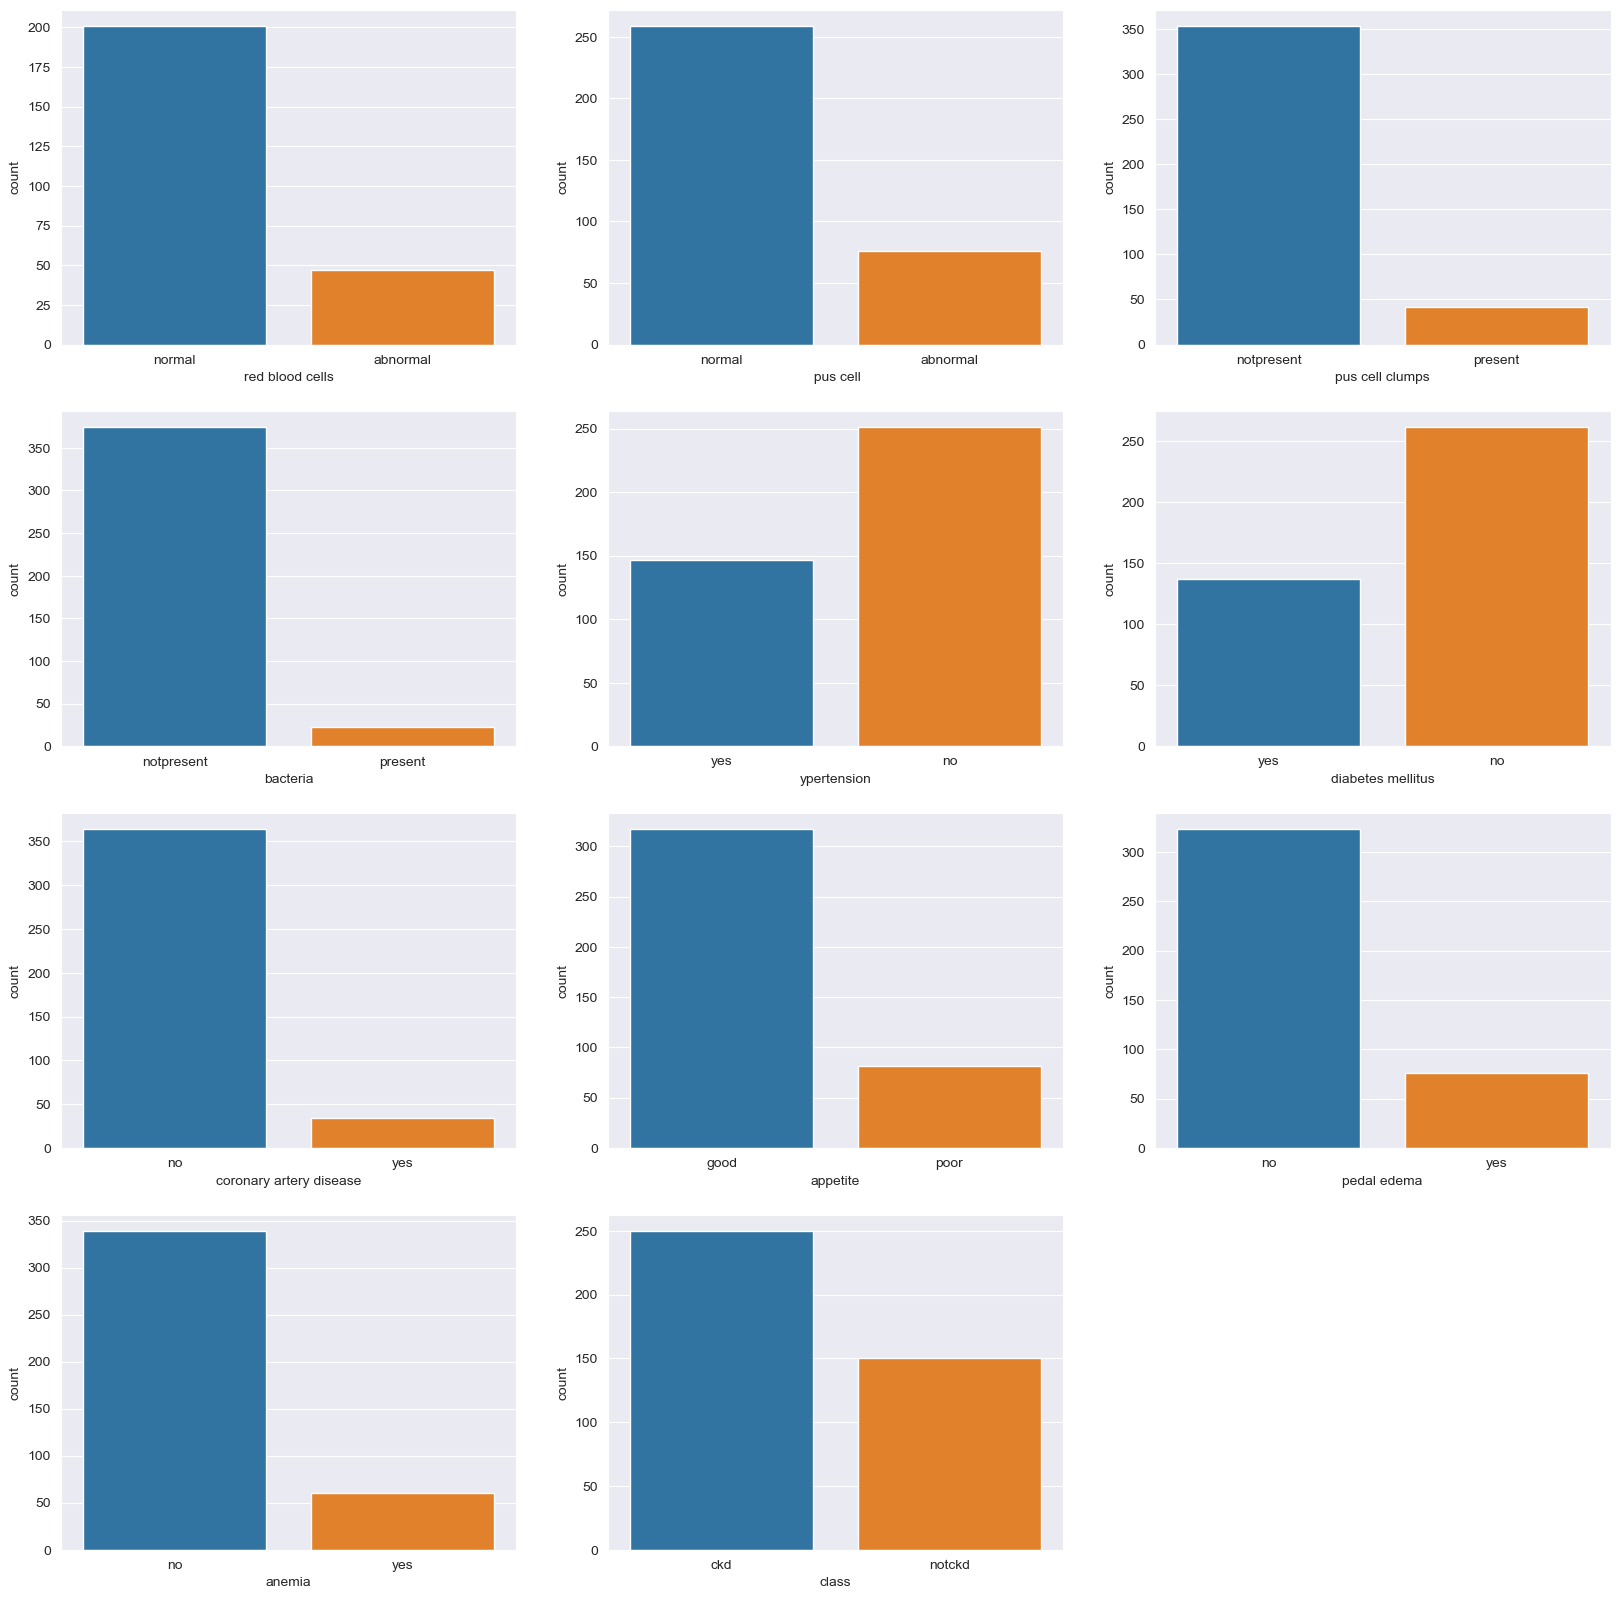

In [25]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    

    A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

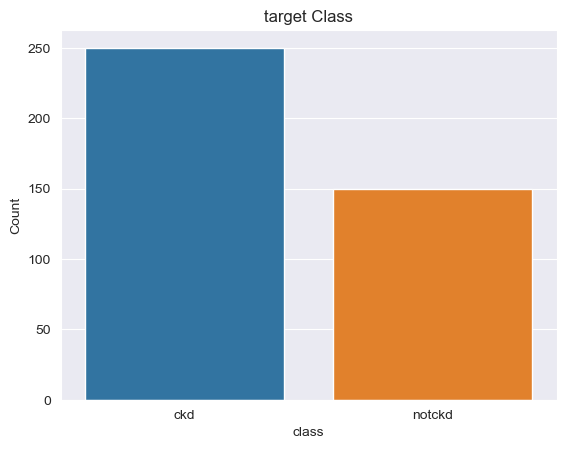

In [26]:
sns.countplot(x='class',data=df)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

In [27]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

###  7. Correlations

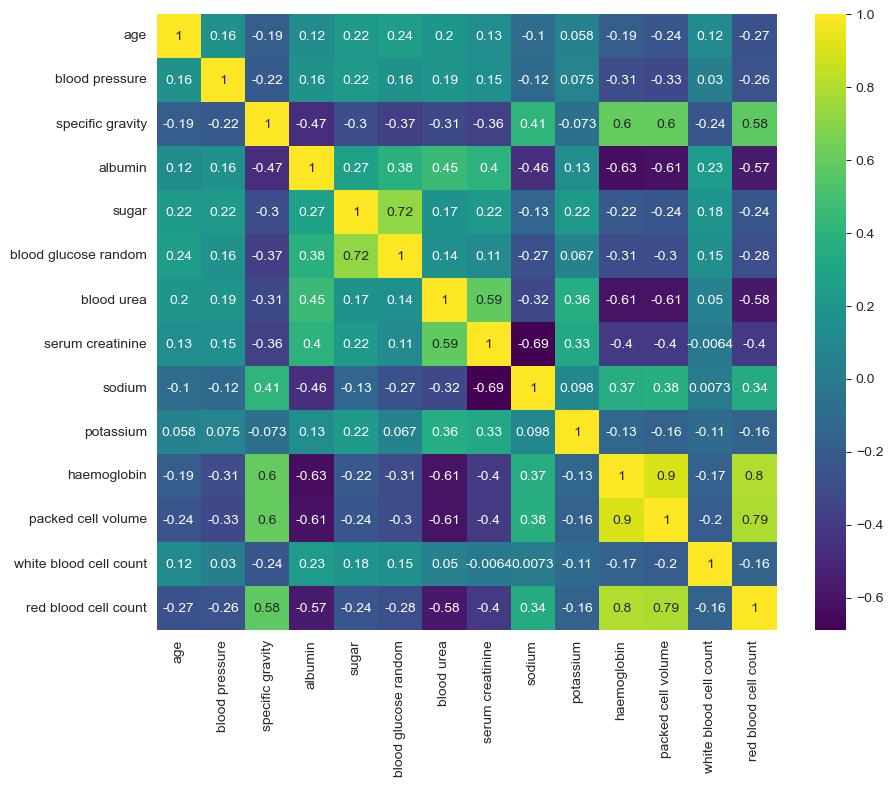

In [28]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True,cmap='viridis')
plt.show()

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [29]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

### Let's check for Positive correlation and its impact on classes¶

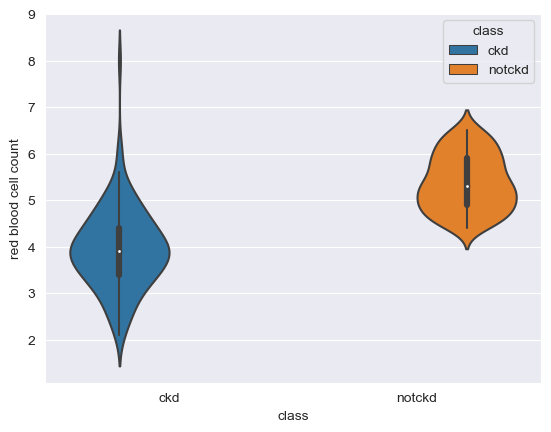

In [30]:
sns.violinplot(data=df,y='red blood cell count',x="class", hue="class");

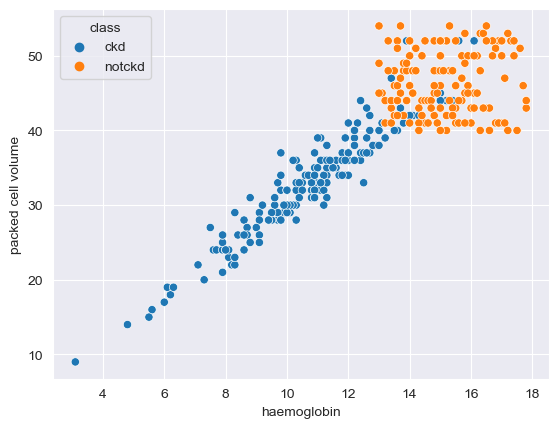

In [31]:
sns.scatterplot(data=df,x='haemoglobin',y='packed cell volume',hue='class');

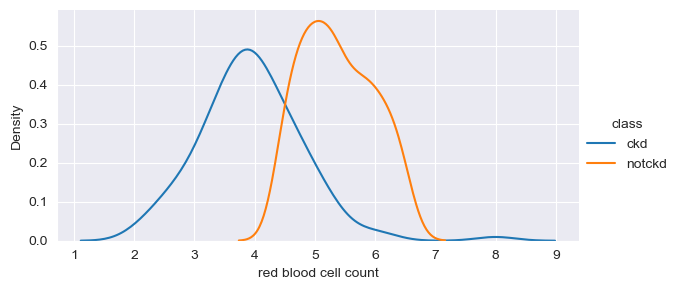

In [32]:
### analysing distribution of 'red_blood_cell_count' in both Labels 
grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()
plt.show()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [33]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = sns.violinplot(data=df, y=col, x="class", hue="class", box=True)
    return fig

def scatters(col1,col2):
    fig = sns.scatterplot(data=df, x=col1, y=col2, hue="class")
    return fig

In [34]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

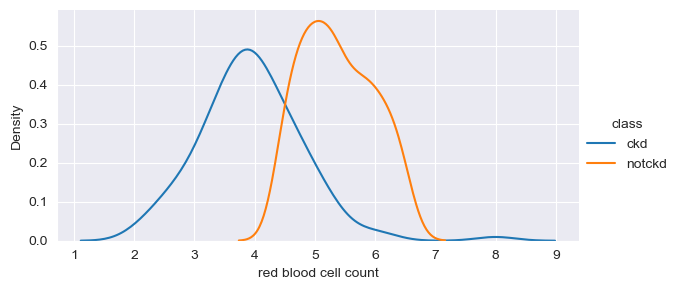

In [35]:
kde_plot('red blood cell count')

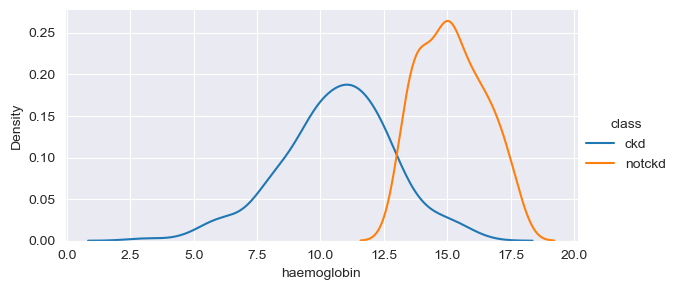

In [36]:
kde_plot('haemoglobin')

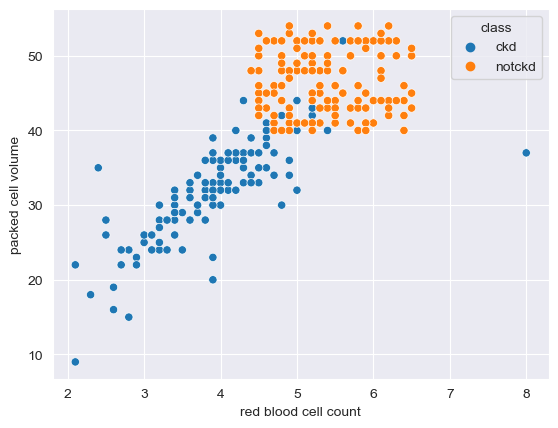

In [37]:
scatters('red blood cell count', 'packed cell volume')
plt.show()

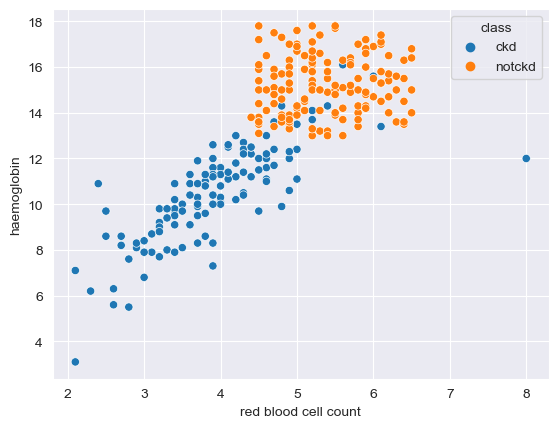

In [38]:
scatters('red blood cell count', 'haemoglobin')
plt.show()

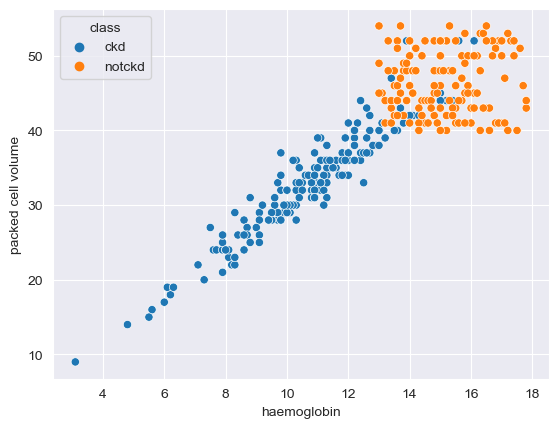

In [39]:
scatters('haemoglobin','packed cell volume')
plt.show()

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

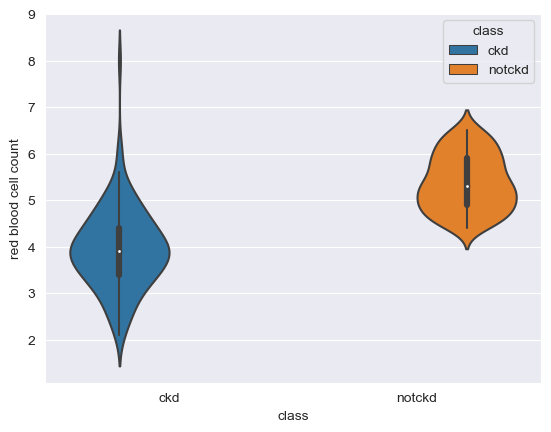

In [40]:
violin('red blood cell count')
plt.show()

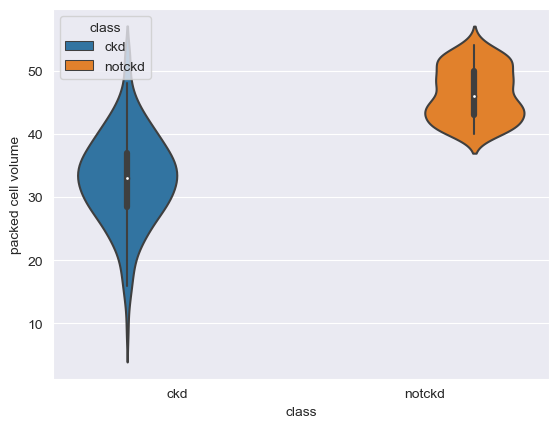

In [41]:
violin('packed cell volume')
plt.show()

###  Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

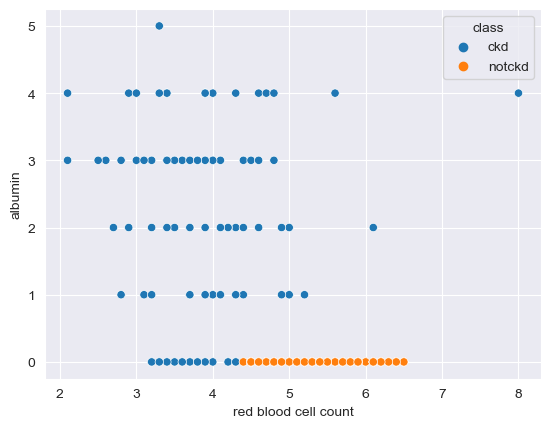

In [42]:
scatters('red blood cell count','albumin')
plt.show()

    Clearly, albumin levels of above 0 affect ckd largely

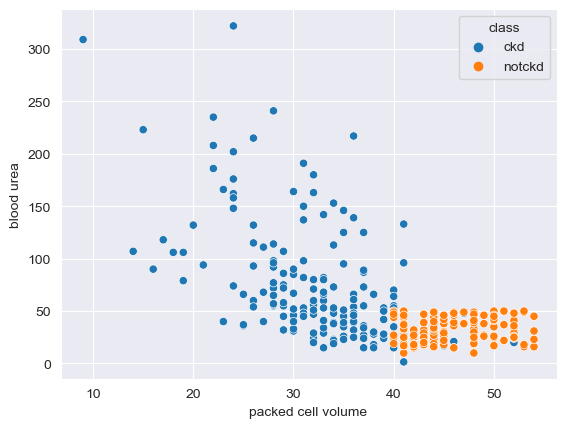

In [43]:
scatters('packed cell volume','blood urea')
plt.show()

    Packed cell volume >= 40 largely affects to be non ckd

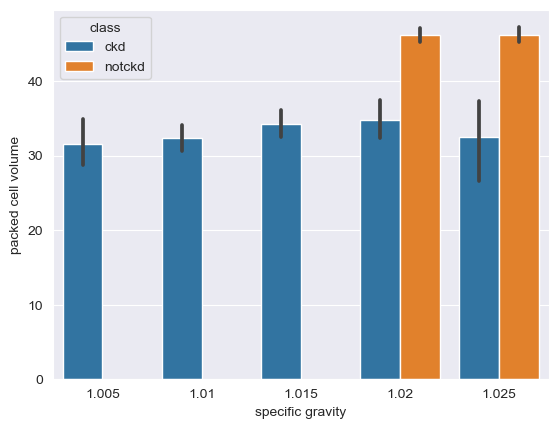

In [44]:
fig = sns.barplot(data=df, x="specific gravity", y="packed cell volume",
             hue='class')
plt.show()

    Clearly, specific gravity >=1.02 affects non ckd

In [45]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [46]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [47]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

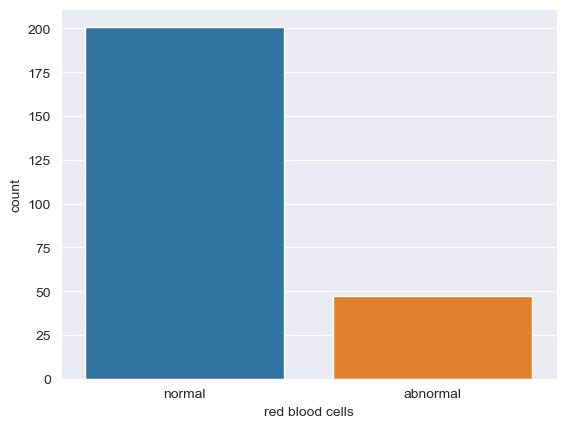

In [48]:
sns.countplot(df['red blood cells'])
plt.show()

In [49]:
data=df.copy()

#### Random Value Imputation

In [50]:
data['red blood cells'].isnull().sum()

152

In [51]:
data['red blood cells'].dropna().sample()

387    normal
Name: red blood cells, dtype: object

In [52]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

356      normal
103      normal
396      normal
29     abnormal
186      normal
         ...   
301      normal
239      normal
137      normal
255      normal
258      normal
Name: red blood cells, Length: 152, dtype: object

In [53]:
random_sample.index

Int64Index([356, 103, 396,  29, 186,   7, 332,  91, 372, 298,
            ...
            342, 265, 370,  14, 277, 301, 239, 137, 255, 258],
           dtype='int64', length=152)

In [54]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [55]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [56]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [57]:
random_sample

0        normal
1        normal
5        normal
6      abnormal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [58]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [59]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


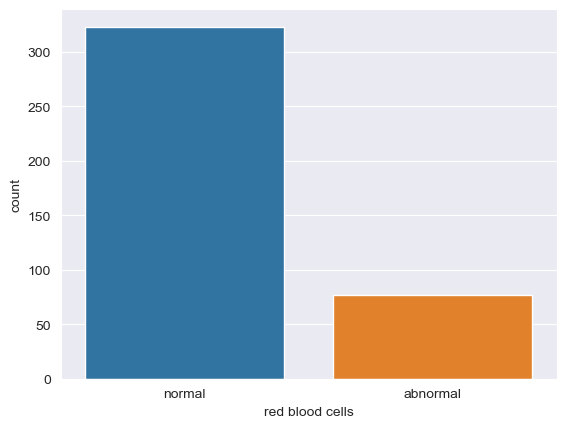

In [60]:
sns.countplot(data['red blood cells'])
plt.show()

In [61]:
data['red blood cells'].value_counts()/len(data)

normal      0.8075
abnormal    0.1925
Name: red blood cells, dtype: float64

In [62]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [63]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [64]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [65]:
Random_value_imputation(' pus cell')
Random_value_imputation('red blood cells')

In [66]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [67]:
### as rest of the features has less missing values,so I can fill it using mode concept

In [68]:
mode=data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [69]:

data['pus cell clumps']=data['pus cell clumps'].fillna(mode)

In [70]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [71]:
for col in cat_col:
    impute_mode(col)

In [72]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [73]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [74]:
### lets fill missing values in Numerical features using Random value Imputation

In [75]:
for col in num_col:
    Random_value_imputation(col)

In [76]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

### feature Encoding

In [77]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))
    

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [78]:
#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [81]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [82]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,172.0,...,38.0,6000.0,5.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


### Feature Importance

SelectKBest-to select k best features
chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
based on that,it will actually order all the features

In [83]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [84]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [85]:
X=data[ind_col]
y=data[dep_col]

In [86]:

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [87]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7fa678ac63a0>)

In [88]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.12239523e+02, 7.44013962e+01, 5.33166652e-03, 2.40241525e+02,
       1.05600000e+02, 1.10136223e+01, 1.20891005e+01, 2.52000000e+01,
       1.32000000e+01, 2.44335911e+03, 2.35084022e+03, 3.65496868e+02,
       2.68075104e+01, 8.47919294e+00, 1.34827646e+02, 3.24461804e+02,
       1.51718118e+04, 2.07503593e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [89]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,112.239523
1,74.401396
2,0.005332
3,240.241525
4,105.600000
5,11.013622
6,12.089101
7,25.200000
8,13.200000
9,2443.359114


In [90]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [91]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [92]:
features_rank

,0,Score
0,age,112.239523
1,blood pressure,74.401396
2,specific gravity,0.005332
3,albumin,240.241525
4,sugar,105.600000
5,red blood cells,11.013622
6,pus cell,12.089101
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2443.359114


In [93]:
#Higher the score is,more important feature is 

In [94]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,112.239523
1,blood pressure,74.401396
2,specific gravity,0.005332
3,albumin,240.241525
4,sugar,105.600000
5,red blood cells,11.013622
6,pus cell,12.089101
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2443.359114


In [95]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,15171.811763
9,blood glucose random,2443.359114
10,blood urea,2350.840216
11,serum creatinine,365.496868
15,packed cell volume,324.461804
3,albumin,240.241525
14,haemoglobin,134.827646
0,age,112.239523
4,sugar,105.600000
18,ypertension,88.200000


In [96]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [97]:
X_new=data[selected_columns]

### Model Building

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [99]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [100]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    194
1    106
Name: class, dtype: int64

In [101]:
### Lets find best model using Hyperparameter optimization

In [102]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [106]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [107]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [108]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/shashi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [109]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [110]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [111]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact',
              validate_parameters=1, verbosity=None)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [112]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor=None, random_state=0, ...)

In [113]:
y_pred=classifier.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [115]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[53  3]
 [ 0 44]]


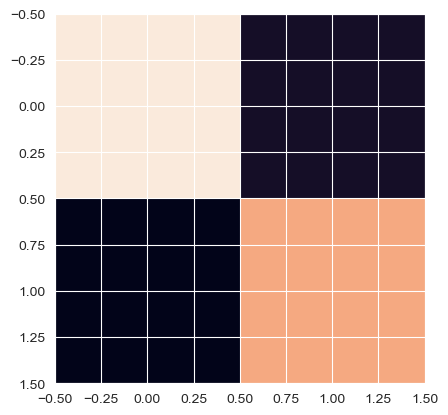

In [116]:
### to make confusion matrix user-friendly
plt.imshow(confusion)
plt.show()

In [117]:
accuracy_score(y_test, y_pred)

0.97